In [1]:
#dependencies
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import cv2
import os

In [2]:
trainpath = 'data/train'
testpath = 'data/test'

In [3]:
categories = os.listdir(trainpath)

In [4]:
X_train = []
Y_train = []
x_test = []
y_test = []

In [5]:
for i, category in enumerate(categories):
    files = os.listdir(os.path.join(trainpath, category))
    for file in files:
        filePath = os.path.join(trainpath, category, file)
        img = cv2.imread(filePath, 0)  # grayscale
        if img is not None:
            X_train.append(img)
            Y_train.append(i)

# Convert to numpy arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)

print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)

X_train shape: (28709, 48, 48)
Y_train shape: (28709,)


In [6]:
img1 = X_train[10]
#cv2.imshow("img1",img1)
#cv2.waitKey(0)

In [7]:
for i, category in enumerate(categories):
    files = os.listdir(os.path.join(testpath, category))
    for file in files:
        filePath = os.path.join(testpath, category, file)
        img = cv2.imread(filePath, 0)  # grayscale
        if img is not None:
            x_test.append(img)
            y_test.append(i)

# Convert to numpy arrays
x_test = np.array(x_test)
y_test = np.array(y_test)

print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_test shape: (7178, 48, 48)
y_test shape: (7178,)


In [8]:
X_train = X_train/255.0
x_test = x_test/255.0

In [9]:
numOfTrainImg = X_train.shape[0]
X_train = X_train.reshape(numOfTrainImg, 48,48,1)
print(X_train[0])
print(X_train.shape)

[[[0.19607843]
  [0.1254902 ]
  [0.05882353]
  ...
  [0.52156863]
  [0.59215686]
  [0.3372549 ]]

 [[0.22352941]
  [0.13333333]
  [0.08627451]
  ...
  [0.54117647]
  [0.59215686]
  [0.34901961]]

 [[0.23921569]
  [0.11764706]
  [0.09411765]
  ...
  [0.55686275]
  [0.58431373]
  [0.34901961]]

 ...

 [[0.40392157]
  [0.39215686]
  [0.39215686]
  ...
  [0.58431373]
  [0.40784314]
  [0.33333333]]

 [[0.41960784]
  [0.43529412]
  [0.44313725]
  ...
  [0.59215686]
  [0.47058824]
  [0.3372549 ]]

 [[0.40784314]
  [0.40784314]
  [0.43921569]
  ...
  [0.56078431]
  [0.53333333]
  [0.3254902 ]]]
(28709, 48, 48, 1)


In [10]:
numOfTrainImg = x_test.shape[0]
x_test = x_test.reshape(numOfTrainImg, 48,48,1)
print(x_test[0])
print(x_test.shape)

[[[0.18039216]
  [0.13333333]
  [0.10196078]
  ...
  [0.03921569]
  [0.05098039]
  [0.08627451]]

 [[0.19607843]
  [0.10980392]
  [0.08235294]
  ...
  [0.04313725]
  [0.03921569]
  [0.08235294]]

 [[0.19607843]
  [0.10588235]
  [0.05882353]
  ...
  [0.08627451]
  [0.09411765]
  [0.08627451]]

 ...

 [[0.81568627]
  [0.70196078]
  [0.42352941]
  ...
  [0.74901961]
  [0.80392157]
  [0.8       ]]

 [[0.83137255]
  [0.77647059]
  [0.58431373]
  ...
  [0.70980392]
  [0.78431373]
  [0.8       ]]

 [[0.81568627]
  [0.78823529]
  [0.67058824]
  ...
  [0.64705882]
  [0.70588235]
  [0.74117647]]]
(7178, 48, 48, 1)


In [11]:
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=7)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=7)

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu", input_shape=(48, 48, 1)),
    tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),

    tf.keras.layers.Conv2D(256, (3, 3), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(256, (3, 3), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(256, (3, 3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),

    tf.keras.layers.Conv2D(512, (3, 3), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(512, (3, 3), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(512, (3, 3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),

    tf.keras.layers.Conv2D(512, (3, 3), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(512, (3, 3), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(512, (3, 3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4096, activation="relu"),
    tf.keras.layers.Dense(7, activation="softmax")
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())



C:\Users\dipta\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 48, 48, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │       2,101,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 33,624,775 (128.27 MB)

 Trainable params: 33,624,775 (128.27 MB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 746s 2s/step - accuracy: 0.8914 - loss: 0.3146 - val_accuracy: 0.5950 - val_loss: 1.6272
Epoch 2/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 767s 2s/step - accuracy: 0.9180 - loss: 0.2401 - val_accuracy: 0.5935 - val_loss: 1.7774
Epoch 3/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 820s 2s/step - accuracy: 0.9407 - loss: 0.1796 - val_accuracy: 0.6018 - val_loss: 1.8294
Epoch 4/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 772s 2s/step - accuracy: 0.9433 - loss: 0.1660 - val_accuracy: 0.6006 - val_loss: 1.9391
Epoch 5/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 764s 2s/step - accuracy: 0.9532 - loss: 0.1359 - val_accuracy: 0.5924 - val_loss: 2.0599
Epoch 6/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 735s 2s/step - accuracy: 0.9621 - loss: 0.1177 - val_accuracy: 0.5960 - val_loss: 2.2291
Epoch 7/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 731s 2s/step - accuracy: 0.9666 - loss: 0.1028 - val_accuracy: 0.6055 - val_loss: 2.2354
Epoch 8/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 728s 2s/step - accuracy: 0.9663 - loss: 0.1041 - val_accu

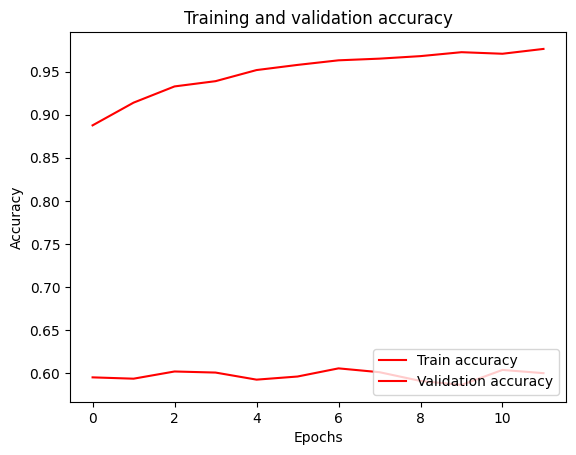

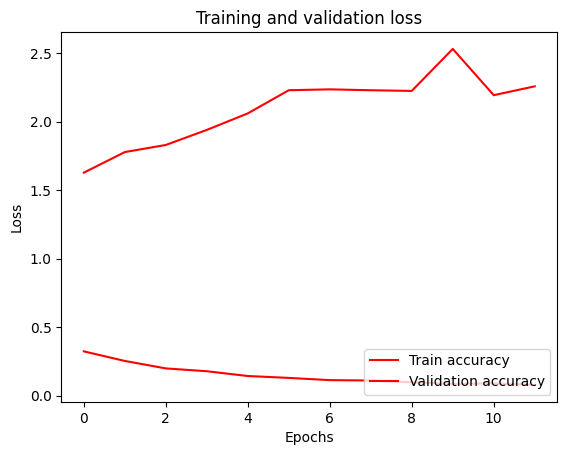

In [14]:
# Train the model
batch_size = 64
epochs = 20
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, Y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test),
    shuffle=True,
    callbacks=[early_stopping]
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label="Train accuracy")
plt.plot(epochs, val_acc, 'r', label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(epochs, loss, 'r', label="Train accuracy")
plt.plot(epochs, val_loss, 'r', label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend(loc='lower right')
plt.show()

modelFileName = "emotion.h5"
model.save(modelFileName)

In [15]:
tf.keras.models.save_model(model,'model.hdf5')